In [1]:
# imports

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score # might never use this one, if so, remove

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# others
# import graphviz
# from graphviz import Graph

# Custom module imports
import acquire as a
import prepare as p
import explore as e

In [2]:
# read raw data info a dataframe (df)
df = a.get_telco_data()

In [3]:
# let's use the prepare.py module to implement findings above and clean data
df = p.clean_telco(df)

In [4]:
# split the df before encoding to prepare for exploration using function from prepare.py
train, validate, test = p.split_telco(df)

In [5]:
# check proportions of splits
print(f'Proportion of train: {train.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of validate: {validate.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of test: {test.shape[0]/df.shape[0]:.2f}')

Proportion of train: 0.60
Proportion of validate: 0.20
Proportion of test: 0.20


In [6]:
# create a list of all numeric columns to use below in function
quant_vars = train.select_dtypes(include = ['number']).columns.tolist()
quant_vars

['tenure', 'monthly_charges', 'total_charges']

In [7]:
# create a list of all categorical columns to use below in function
cat_vars = train.select_dtypes(include = 'object').columns.tolist()
cat_vars

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'internet_service_type',
 'contract_type',
 'payment_type']

In [8]:
# we need to remove the target variable from our list of cat_vars
cat_vars.pop(13)

'churn'

In [9]:
cat_vars

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'internet_service_type',
 'contract_type',
 'payment_type']

In [10]:
train.head().T

,6169,3290,3615,6309,856
gender,Female,Female,Male,Male,Male
senior_citizen,No,No,No,No,Yes
partner,Yes,Yes,Yes,No,No
dependents,No,Yes,No,Yes,No
tenure,72,28,5,39,45
phone_service,Yes,Yes,No,Yes,Yes
multiple_lines,Yes,Yes,No,Yes,Yes
online_security,Yes,No,No,No,No
online_backup,No,No,No,No,No
device_protection,Yes,No,No,No,No


In [11]:
train_temp = train.copy()

In [12]:
train_temp.head().T

,6169,3290,3615,6309,856
gender,Female,Female,Male,Male,Male
senior_citizen,No,No,No,No,Yes
partner,Yes,Yes,Yes,No,No
dependents,No,Yes,No,Yes,No
tenure,72,28,5,39,45
phone_service,Yes,Yes,No,Yes,Yes
multiple_lines,Yes,Yes,No,Yes,Yes
online_security,Yes,No,No,No,No
online_backup,No,No,No,No,No
device_protection,Yes,No,No,No,No


In [13]:
train_temp.churn = np.where(train_temp.churn == 'Yes', 1, 0)

In [14]:
# train_temp.churn = train_temp.churn.replace(to_replace='Yes', value=1)
# train_temp.churn = train_temp.churn.replace(to_replace='No', value=0)

In [15]:
train_temp.head().T

,6169,3290,3615,6309,856
gender,Female,Female,Male,Male,Male
senior_citizen,No,No,No,No,Yes
partner,Yes,Yes,Yes,No,No
dependents,No,Yes,No,Yes,No
tenure,72,28,5,39,45
phone_service,Yes,Yes,No,Yes,Yes
multiple_lines,Yes,Yes,No,Yes,Yes
online_security,Yes,No,No,No,No
online_backup,No,No,No,No,No
device_protection,Yes,No,No,No,No


In [16]:
train.head().T

,6169,3290,3615,6309,856
gender,Female,Female,Male,Male,Male
senior_citizen,No,No,No,No,Yes
partner,Yes,Yes,Yes,No,No
dependents,No,Yes,No,Yes,No
tenure,72,28,5,39,45
phone_service,Yes,Yes,No,Yes,Yes
multiple_lines,Yes,Yes,No,Yes,Yes
online_security,Yes,No,No,No,No
online_backup,No,No,No,No,No
device_protection,Yes,No,No,No,No


In [24]:
# let's call the function
# e.explore_bivariate(train_temp, 'churn', cat_vars, quant_vars)

gender 
_____________________

       chi2   p-value  degrees of freedom
0  0.116092  0.733312                   1




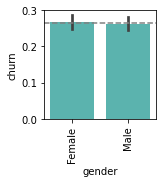


_____________________

senior_citizen 
_____________________

        chi2       p-value  degrees of freedom
0  126.71297  2.146819e-29                   1




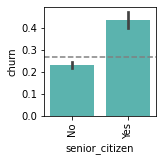


_____________________

partner 
_____________________

        chi2       p-value  degrees of freedom
0  85.438559  2.390140e-20                   1




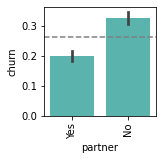


_____________________

dependents 
_____________________

         chi2       p-value  degrees of freedom
0  125.315832  4.340610e-29                   1




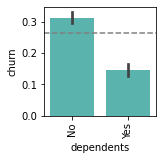


_____________________

phone_service 
_____________________

       chi2   p-value  degrees of freedom
0  1.837203  0.175279                   1




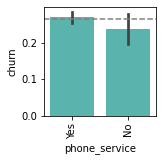


_____________________

multiple_lines 
_____________________

        chi2   p-value  degrees of freedom
0  11.507626  0.000693                   1




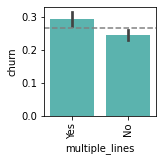


_____________________

online_security 
_____________________

        chi2       p-value  degrees of freedom
0  122.15068  2.139555e-28                   1




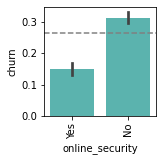


_____________________

online_backup 
_____________________

        chi2       p-value  degrees of freedom
0  28.759295  8.195561e-08                   1




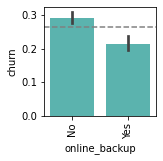


_____________________

device_protection 
_____________________

        chi2   p-value  degrees of freedom
0  21.827182  0.000003                   1




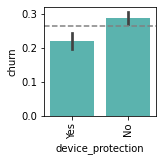


_____________________

tech_support 
_____________________

         chi2       p-value  degrees of freedom
0  114.193717  1.181803e-26                   1




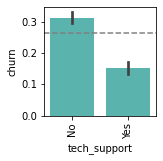


_____________________

streaming_tv 
_____________________

        chi2   p-value  degrees of freedom
0  18.401119  0.000018                   1




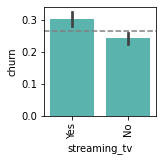


_____________________

streaming_movies 
_____________________

        chi2   p-value  degrees of freedom
0  13.076863  0.000299                   1




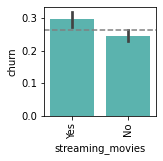


_____________________

paperless_billing 
_____________________

         chi2       p-value  degrees of freedom
0  148.148111  4.403064e-34                   1




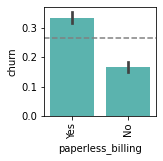


_____________________

internet_service_type 
_____________________

         chi2       p-value  degrees of freedom
0  440.801802  1.910315e-96                   2




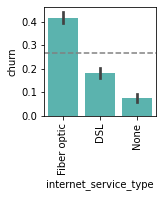


_____________________

contract_type 
_____________________

         chi2        p-value  degrees of freedom
0  673.953198  4.496997e-147                   2




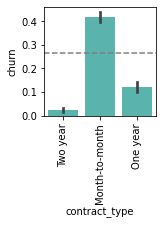


_____________________

payment_type 
_____________________

         chi2       p-value  degrees of freedom
0  412.264701  4.880175e-89                   3




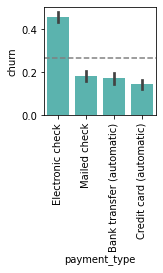


_____________________



In [18]:
for cat in cat_vars:
    e.explore_bivariate_categorical(train_temp, 'churn', cat)

tenure 
____________________



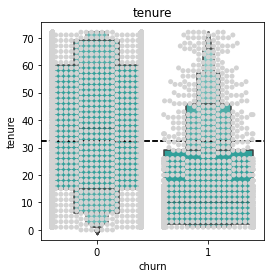

        count       mean        std  min   25%   50%    75%   max
churn                                                            
0      3104.0  37.432990  24.087859  0.0  15.0  37.0  60.25  72.0
1      1121.0  18.036574  19.485285  1.0   2.0  10.0  29.00  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2566280.0, pvalue=2.2758832595981456e-123)

____________________

monthly_charges 
____________________



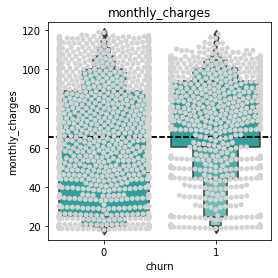

        count       mean        std    min   25%    50%   75%     max
churn                                                                
0      3104.0  61.755751  31.071276  18.25  25.1  65.25  89.0  118.75
1      1121.0  75.056646  24.435249  18.95  60.4  79.90  94.2  117.80 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1313871.5, pvalue=4.646157723850262e-34)

____________________

total_charges 
____________________



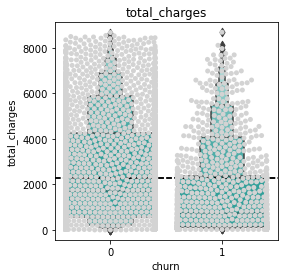

        count         mean          std   min       25%      50%        75%  \
churn                                                                         
0      3104.0  2565.274887  2330.960610   0.0  578.1625  1724.05  4264.4375   
1      1121.0  1546.124532  1883.590483  19.1  135.0000   723.40  2354.8000   

           max  
churn           
0      8672.45  
1      8684.80   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2254399.0, pvalue=6.381351636087388e-49)

____________________



In [23]:
# let's try this for numerical bivariate
for var in quant_vars:
    e.explore_bivariate_quant(train_temp, 'churn', var)

In [27]:
# lets take a look at multivariate
# e.explore_multivariate(train_temp, 'churn', cat_vars, quant_vars)

Where I left off:
- Try out the explore_multivariate function on this dataset
- will need to change figure size and rotate x labels